In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('shopping_trends.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
data.shape

(3900, 19)

In [ ]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [ ]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

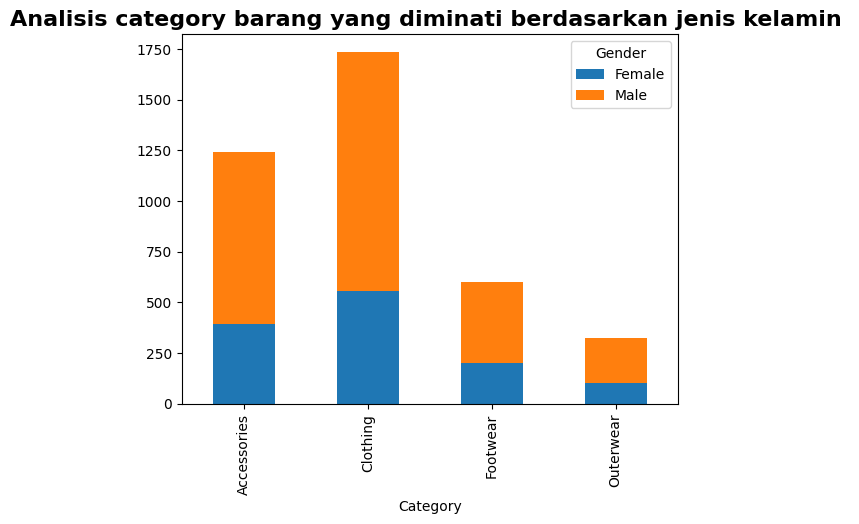

In [ ]:
trends_df = data.groupby(['Category','Gender']).size().to_frame('count').reset_index() #grouped the data by province and count then create new dataframe
trends_df.head()
tmp = trends_df.set_index(['Category','Gender']).unstack() #convert the data into unstacked format
tmp.columns = tmp.columns.levels[1]
tmp.head()

tmp.plot(kind='bar',stacked=True) # plot stack bar chart

plt.title(
      'Analisis category barang yang diminati berdasarkan jenis kelamin ', #set title
      weight='bold'
    ).set_fontsize('16')
plt.show()

In [ ]:
#jenis barang berdasarkan rata-rata usia pembeli
average_age=data.groupby(by='Category').mean()[['Age']]
average_age

<ipython-input-8-9d8493f3101e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_age=data.groupby(by='Category').mean()[['Age']]


,Age
Category,
Accessories,44.224194
Clothing,43.782959
Footwear,44.442404
Outerwear,44.311728


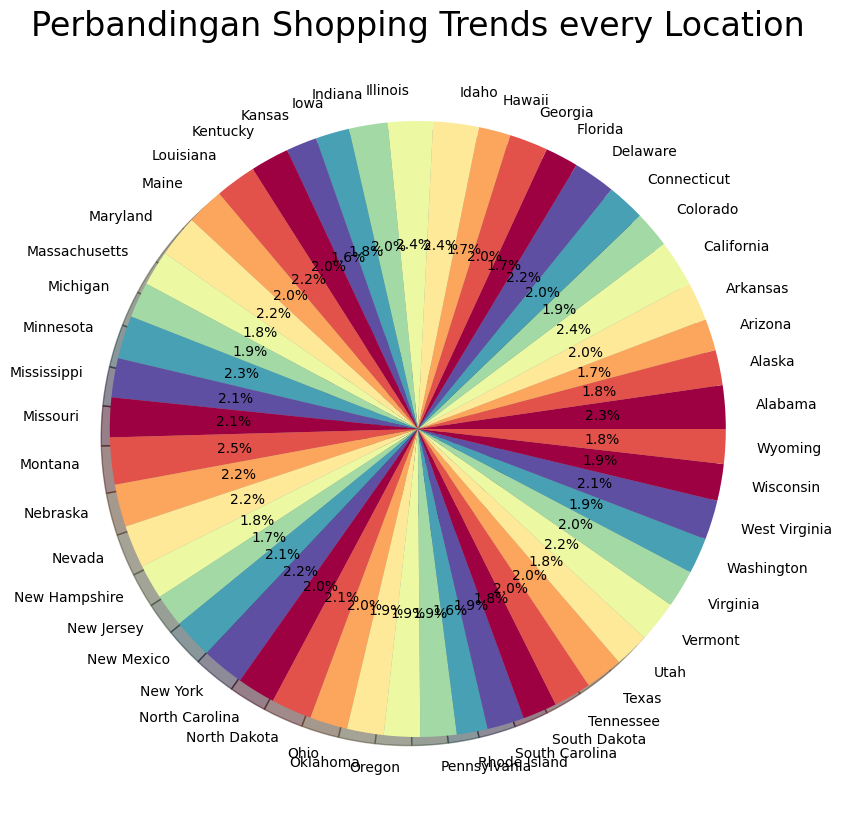

In [ ]:
source_labels = data.groupby(['Location']).size().index
source_counts = data.groupby(['Location']).size().values #reutrn number of grouped rows each group

plt.figure(1, figsize=(20,10)) #make square figures and axes

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)] #get spectral color map and create sequence

source_pie = plt.pie(
      source_counts,
      labels=source_labels,
      autopct='%1.1f%%', #display the percent value
      shadow=True,
      colors=colors
    )

plt.title('Perbandingan Shopping Trends every Location', fontsize=24)
plt.show()

In [ ]:
#rata-rata rating tiap category item
average_rating=data.groupby(by='Category').mean()[['Review Rating']]
average_rating

<ipython-input-10-3672606c6904>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating=data.groupby(by='Category').mean()[['Review Rating']]


,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


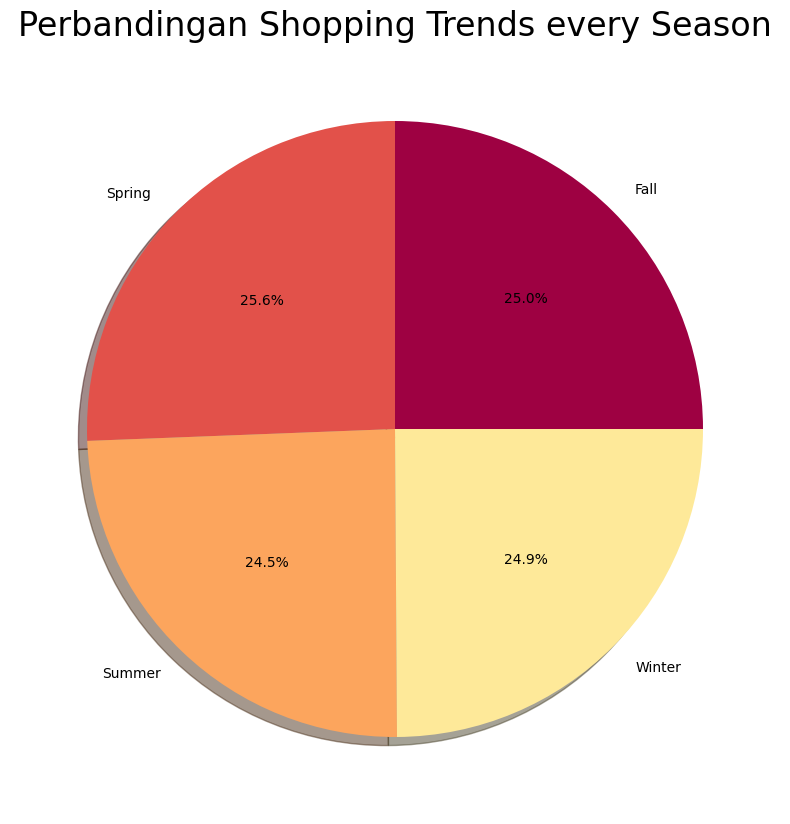

In [ ]:
source_labels = data.groupby(['Season']).size().index
source_counts = data.groupby(['Season']).size().values #reutrn number of grouped rows each group

plt.figure(1, figsize=(20,10)) #make square figures and axes

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)] #get spectral color map and create sequence

source_pie = plt.pie(
      source_counts,
      labels=source_labels,
      autopct='%1.1f%%', #display the percent value
      shadow=True,
      colors=colors
    )

plt.title('Perbandingan Shopping Trends every Season', fontsize=24)
plt.show()

In [ ]:
data.loc[:,'clothing']=[1 if x=="Clothing" else 0 for x in data['Category']]
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,clothing
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,1
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,0
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,0


In [ ]:
#total pembelian tiap category item
amount_Purchases=data.groupby(by='Category').count()[['Previous Purchases']]
amount_Purchases

,Previous Purchases
Category,
Accessories,1240
Clothing,1737
Footwear,599
Outerwear,324


In [ ]:
#mengetahui jumlah pembelian tiap item
amount_item_Purchases=data.groupby(by='Item Purchased').count()[['clothing']]
amount_item_Purchases

,clothing
Item Purchased,
Backpack,143
Belt,161
Blouse,171
Boots,144
Coat,161
Dress,166
Gloves,140
Handbag,153
Hat,154


In [ ]:
#mengetahui payment method yang paling banyak di pakai
data.groupby(by='Preferred Payment Method').count()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,clothing
Preferred Payment Method,,,,,,,,,,,,,,,,,,,
Bank Transfer,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612,612
Cash,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670
Credit Card,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671,671
Debit Card,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636,636
PayPal,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677,677
Venmo,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634,634


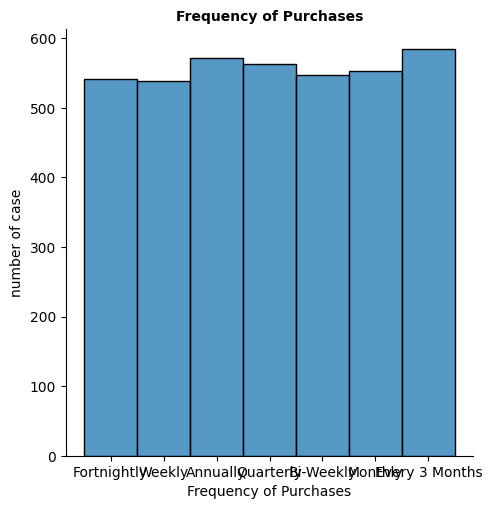

In [ ]:
sns.displot(
    data['Frequency of Purchases'], #data
    kde=False, #remove the density line on the histogram
    bins=18 #split the data into 6 bins
)

plt.title("Frequency of Purchases", weight='bold').set_fontsize('10')
plt.ylabel('number of case') #set ylabel
plt.show()